In [1]:
import numpy as np 
from PIL import Image
import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pandas as pd
from tqdm import tqdm_notebook

In [2]:
import os
os.getcwd()

'/Volumes/Part 1/UC Berkeley/Capstone Project/Code'

In [3]:
# File path for training data
file_path = glob('/Volumes/Part 1/UC Berkeley/Capstone Project/Datasets/Berkeley Deep Drive/bdd100k/images/100k/train/*')

len(file_path)

70000

In [6]:
# Opeining image from the train image data
img = Image.open(file_path[1])

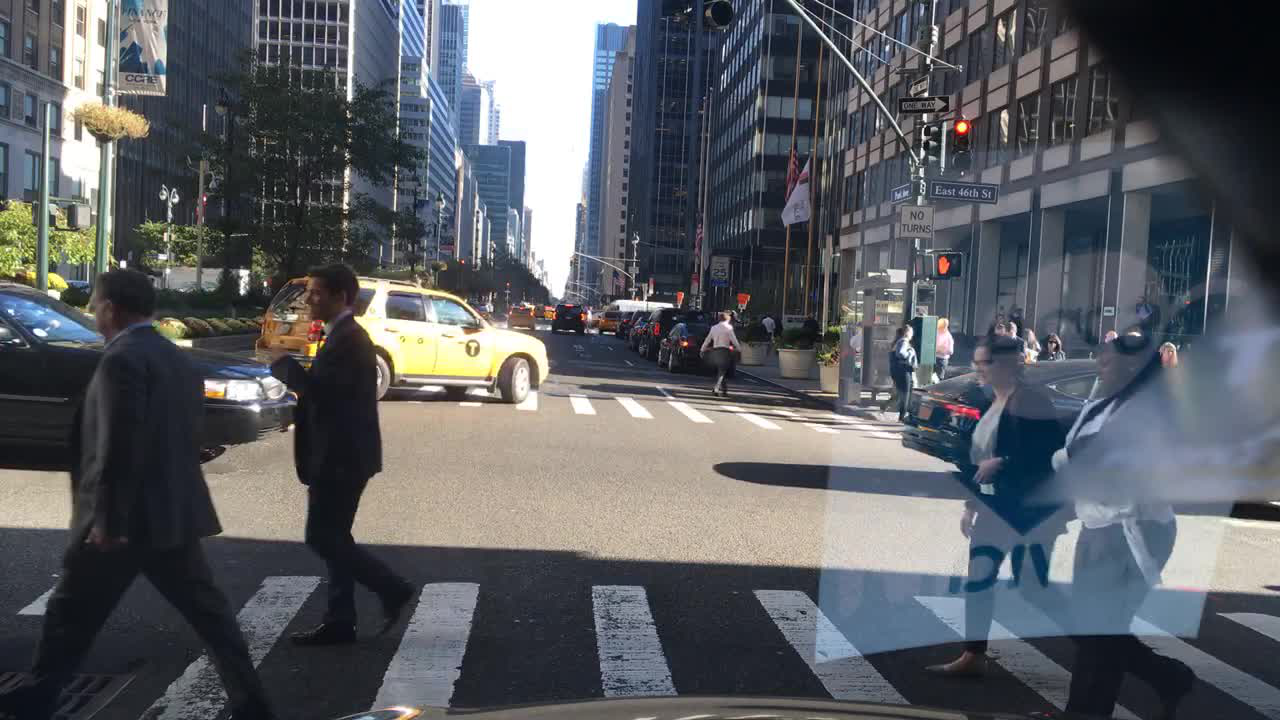

In [7]:
img

In [10]:
np.array(img).shape

(720, 1280, 3)

In [11]:
# Number of classes
classes =['person','rider','bike','bus','car','motor','truck','train']

### <center>Bounding Box parameters schematic diagram:</center>
![](bbox.jpg)

In [12]:
# Creating a dictionary to store image file name, class in image, bounding box coordinates
labels_csv = dict()
labels_csv['file'] = []
labels_csv['x_min'] = []
labels_csv['y_min'] = []
labels_csv['x_max'] = []
labels_csv['y_max'] = []
labels_csv['class'] = []

In [13]:
# function to save bbox values for each object

def extract_labels(file_name, obj):
    """
    Store the labels to a csv file
    """
    category = obj['category']
    if category in classes:
        bbox = obj['box2d']
        labels_csv['file'].append(file_name)
        labels_csv['x_min'].append(bbox['x1'])
        labels_csv['y_min'].append(bbox['y1'])
        labels_csv['x_max'].append(bbox['x2'])
        labels_csv['y_max'].append(bbox['y2'])
        labels_csv['class'].append(category)
    return category

In [23]:
def convert_labels(label_path):
    # Extracting labels from json file and storing it as an csv file
    print('Conversion Started.......')
    
    with open(label_path) as f:
        json_file = json.load(f)
        for i in json_file:
            fn = i['name']
            for obj in i['labels']:
                cat = extract_labels(fn, obj)
    df = pd.DataFrame(labels_csv)
    df.to_csv('/Volumes/Part 1/UC Berkeley/Capstone Project/Code/labels_new.csv', index=False)
    print('Conversion done!!!!!!!!!')

In [24]:
jlabels = '/Volumes/Part 1/UC Berkeley/Capstone Project/Datasets/Berkeley Deep Drive/labels/bdd100k_labels_images_train.json'

In [25]:
convert_labels(jlabels)

Conversion Started.......
Conversion done!!!!!!!!!


In [28]:
# inspecting the dataframe for the annotations 
labels = pd.read_csv('/Volumes/Part 1/UC Berkeley/Capstone Project/Code/labels_new.csv')
labels.head()

,file,x_min,y_min,x_max,y_max,class
0,0000f77c-6257be58.jpg,45.240919,254.530367,357.805838,487.906215,car
1,0000f77c-6257be58.jpg,507.827550,221.727518,908.367588,442.715126,car
2,0000f77c-62c2a288.jpg,423.158909,336.241987,434.176547,358.277263,person
3,0000f77c-62c2a288.jpg,563.939839,324.000165,573.733294,348.483804,person
4,0000f77c-62c2a288.jpg,656.977672,315.838956,666.771127,345.219323,person


In [27]:
labels.groupby(['class']).count()

,file,x_min,y_min,x_max,y_max
class,,,,,
bike,21630,21630,21630,21630,21630
bus,35016,35016,35016,35016,35016
car,2139633,2139633,2139633,2139633,2139633
motor,9006,9006,9006,9006,9006
person,274047,274047,274047,274047,274047
rider,13551,13551,13551,13551,13551
train,408,408,408,408,408
truck,89913,89913,89913,89913,89913


In [29]:
labels.groupby(['file','class']).count().head(10)

x_min  y_min  x_max  y_max
file                  class                             
0000f77c-6257be58.jpg car         6      6      6      6
0000f77c-62c2a288.jpg person      9      9      9      9
0000f77c-cb820c98.jpg car        21     21     21     21
0001542f-5ce3cf52.jpg bus         3      3      3      3
                      car        27     27     27     27
0001542f-7c670be8.jpg car         9      9      9      9
                      person      3      3      3      3
0001542f-ec815219.jpg car        27     27     27     27
0004974f-05e1c285.jpg car        18     18     18     18
00054602-3bf57337.jpg car        15     15     15     15

In [30]:
class_names = ('person','rider','bike','bus','car','motor','truck','train')

cls = {'person':1,
       'rider':2,
       'bike':3,
       'bus':4,
       'car':5,
       'motor':6,
       'truck':7,
       'train':8}

In [31]:
labels['class'] = labels['class'].map(cls)

In [32]:
labels.head()

,file,x_min,y_min,x_max,y_max,class
0,0000f77c-6257be58.jpg,45.240919,254.530367,357.805838,487.906215,5
1,0000f77c-6257be58.jpg,507.827550,221.727518,908.367588,442.715126,5
2,0000f77c-62c2a288.jpg,423.158909,336.241987,434.176547,358.277263,1
3,0000f77c-62c2a288.jpg,563.939839,324.000165,573.733294,348.483804,1
4,0000f77c-62c2a288.jpg,656.977672,315.838956,666.771127,345.219323,1


In [33]:
lb_cols = list(labels.columns)
lb_cols.remove('file')

In [34]:
# take the filenames that are same
fn = labels['file'].unique()

In [35]:
lb_cols

['x_min', 'y_min', 'x_max', 'y_max', 'class']

In [38]:
len(fn)

69405

In [45]:
# Preprocess the box coordinates for first 1000 images stored in the 100K train dataset.
boxes = []
for i in range(fn[:1000].shape[0]):
    boxes.append(labels[labels['file'] == fn[i]][lb_cols].values)

In [47]:
len(boxes)

1000

In [48]:
# bounding box parameters for an image having 6 objects
boxes[0]

array([[ 45.240919, 254.530367, 357.805838, 487.906215,   5.      ],
       [507.82755 , 221.727518, 908.367588, 442.715126,   5.      ],
       [ 45.240919, 254.530367, 357.805838, 487.906215,   5.      ],
       [507.82755 , 221.727518, 908.367588, 442.715126,   5.      ],
       [ 45.240919, 254.530367, 357.805838, 487.906215,   5.      ],
       [507.82755 , 221.727518, 908.367588, 442.715126,   5.      ]])

In [50]:
# bounding box parameters for an image having 30+ objects
boxes[3]

array([[490.628467, 341.852989, 513.110095, 355.077477,   5.      ],
       [542.203967, 343.175437, 571.297838, 364.334618,   5.      ],
       [555.428455, 340.53054 , 600.391709, 374.914207,   5.      ],
       [512.228456, 342.955033, 537.354981, 362.791763,   5.      ],
       [574.383545, 340.310135, 632.571287, 383.950942,   5.      ],
       [444.783572, 333.697893, 473.877443, 346.92238 ,   5.      ],
       [427.591739, 328.408097, 450.073367, 342.955033,   5.      ],
       [309.452996, 336.166461, 354.069112, 353.358294,   5.      ],
       [363.673392, 333.918296, 413.926443, 352.432578,   5.      ],
       [261.497704, 329.95095 , 325.32238 , 352.432578,   4.      ],
       [490.628467, 341.852989, 513.110095, 355.077477,   5.      ],
       [542.203967, 343.175437, 571.297838, 364.334618,   5.      ],
       [555.428455, 340.53054 , 600.391709, 374.914207,   5.      ],
       [512.228456, 342.955033, 537.354981, 362.791763,   5.      ],
       [574.383545, 340.310135, 63

In [ ]:
# save the boxes and filenames as numpy arrays for later use
np.save('/Volumes/Part 1/UC Berkeley/Capstone Project/Code/boxes_new.npy', boxes)
np.save('/Volumes/Part 1/UC Berkeley/Capstone Project/Code/fns.npy', fns[:1000])